In [1]:
import numpy as np 
from matplotlib import pyplot as plt 
from numba import njit
import sys
from timeit import default_timer as timer
from scipy.stats import gaussian_kde,iqr
import glob
from numba import njit 
import os

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [2]:
files=[]
#files_small=[]
#files_large=[]
for file in glob.glob("data*.dat"):
    files.append(file)
print(files)
print(len(files))
fold_part=os.getcwd()[-8:]
print(fold_part)

['data_equilg13_rg_SMALL_250.dat', 'data_equil_1g13_rg_SMALL_250.dat', 'data_equil_2g13_rg_SMALL_250.dat', 'data_equil_3g13_rg_SMALL_250.dat']
4
arge_250


Working on file: data_equilg13_rg_SMALL_250.dat
Working on file: data_equil_1g13_rg_SMALL_250.dat
Working on file: data_equil_2g13_rg_SMALL_250.dat
Working on file: data_equil_3g13_rg_SMALL_250.dat


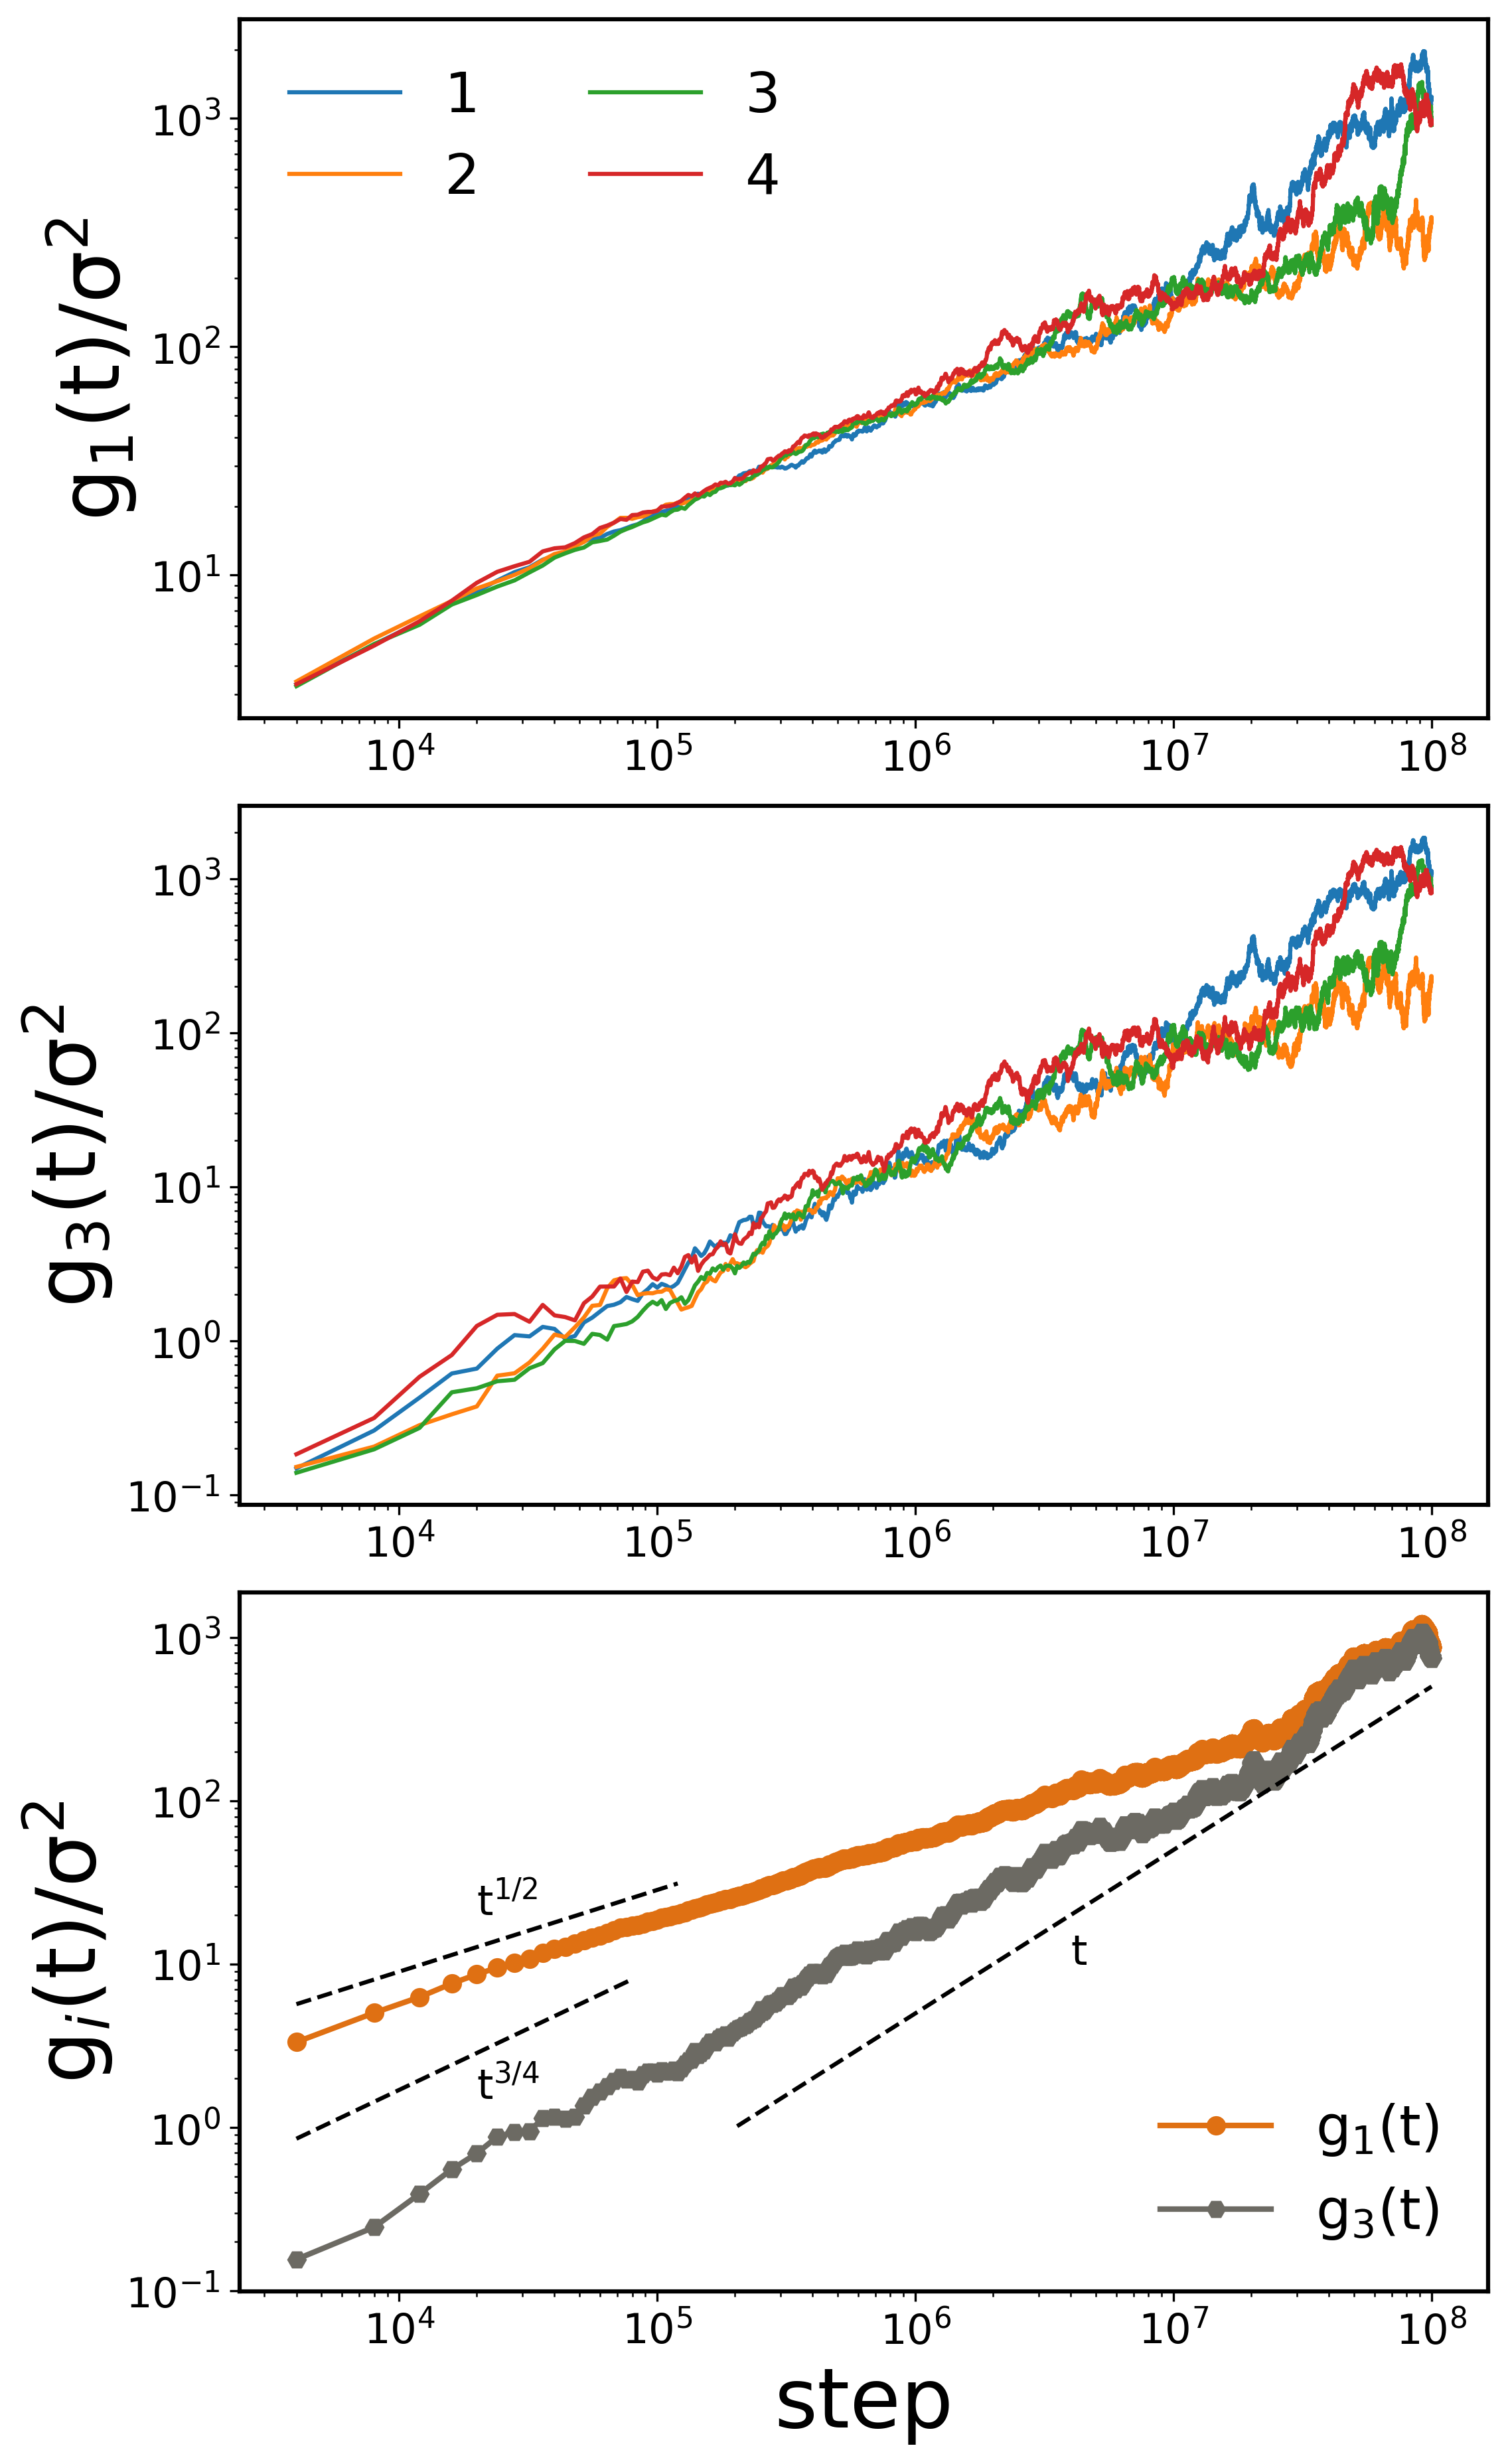

In [3]:
################## for large rings ############################


temp=np.genfromtxt(files[0])
avg_g123=np.zeros(temp.shape)
fig, (ax, ax1,ax2) = plt.subplots(3, 1,figsize=(7,12))
fig.tight_layout()
for axis in ['top','bottom','left','right']:
      ax.spines[axis].set_linewidth(1.5)
      ax1.spines[axis].set_linewidth(1.5)
      ax2.spines[axis].set_linewidth(1.5)
i=0
for file in files:
    print("Working on file:",file)
    g123=np.genfromtxt(file)
    exec('g123_%s=g123'%(i))
    ax.set_ylabel("g$_1$(t)/σ$^2$",fontsize=30)
    #ax.set_xlabel("t/τ",fontsize=30)
    ax.tick_params(labelsize=15) 
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax1.set_yscale('log')
    ax1.set_xscale('log')
    #ax.set_yticklabels(fontsize=15)
    ax1.set_ylabel("g$_3$(t)/σ$^2$",fontsize=30)
    #ax1.set_xlabel("t/τ",fontsize=30)
    ax1.tick_params(labelsize=15)
    #plt.locator_params(axis='y',nbins=5)
    ax.plot(g123[:,0],g123[:,1],label=i+1)
    ax1.plot(g123[:,0],g123[:,2],label=i+1)
    ax.legend(frameon=False,fontsize=20,ncol=2)
    
    #plt.text(2E4,5,'t$^{3/4}$',fontsize=15)
    #plt.text(2E4,50,'t$^{1/2}$',fontsize=15)
    #plt.text(3E6,150,'t$^{1}$',fontsize=15)

    avg_g123[:,1:4]+=g123[:,1:4]
    i+=1
count=i
avg_g123[:,1:4]=avg_g123[:,1:4]/count
avg_g123[:,0]=g123[:,0]
ax2.set_ylabel("g$_i$(t)/σ$^2$",fontsize=30)
ax2.set_xlabel("step",fontsize=30)
ax2.tick_params(labelsize=15) 
ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.plot(avg_g123[:,0],avg_g123[:,1],label="g$_1$(t)",marker='o',color='#df7013',lw=2)
ax2.plot(avg_g123[:,0],avg_g123[:,2],label="g$_3$(t)",marker='H',color='#6c6a63',lw=2)
ax2.legend(loc=4,frameon=False,fontsize=20)
plt.text(2E4,1.5,'t$^{3/4}$',fontsize=15)
plt.text(2E4,20,'t$^{1/2}$',fontsize=15)
plt.text(4E6,10,'t',fontsize=15)
#g123[:,0]=g123[:,0]*0.01
plt.plot(g123[:20,0],0.0017*g123[:20,0]**(3/4),'k--')
plt.plot(g123[50:,0],0.000005*g123[50:,0]**1,'k--')
plt.plot(g123[:30,0],0.09*g123[:30,0]**(1/2),'k--')
#fig.show(111)
fig.savefig('msds_large.jpg',dpi=300,bbox_inches='tight')
#fold_part=os.getcwd()[-16:]
np.savetxt("../avg_large_%s"%(fold_part),avg_g123)

0
1
2


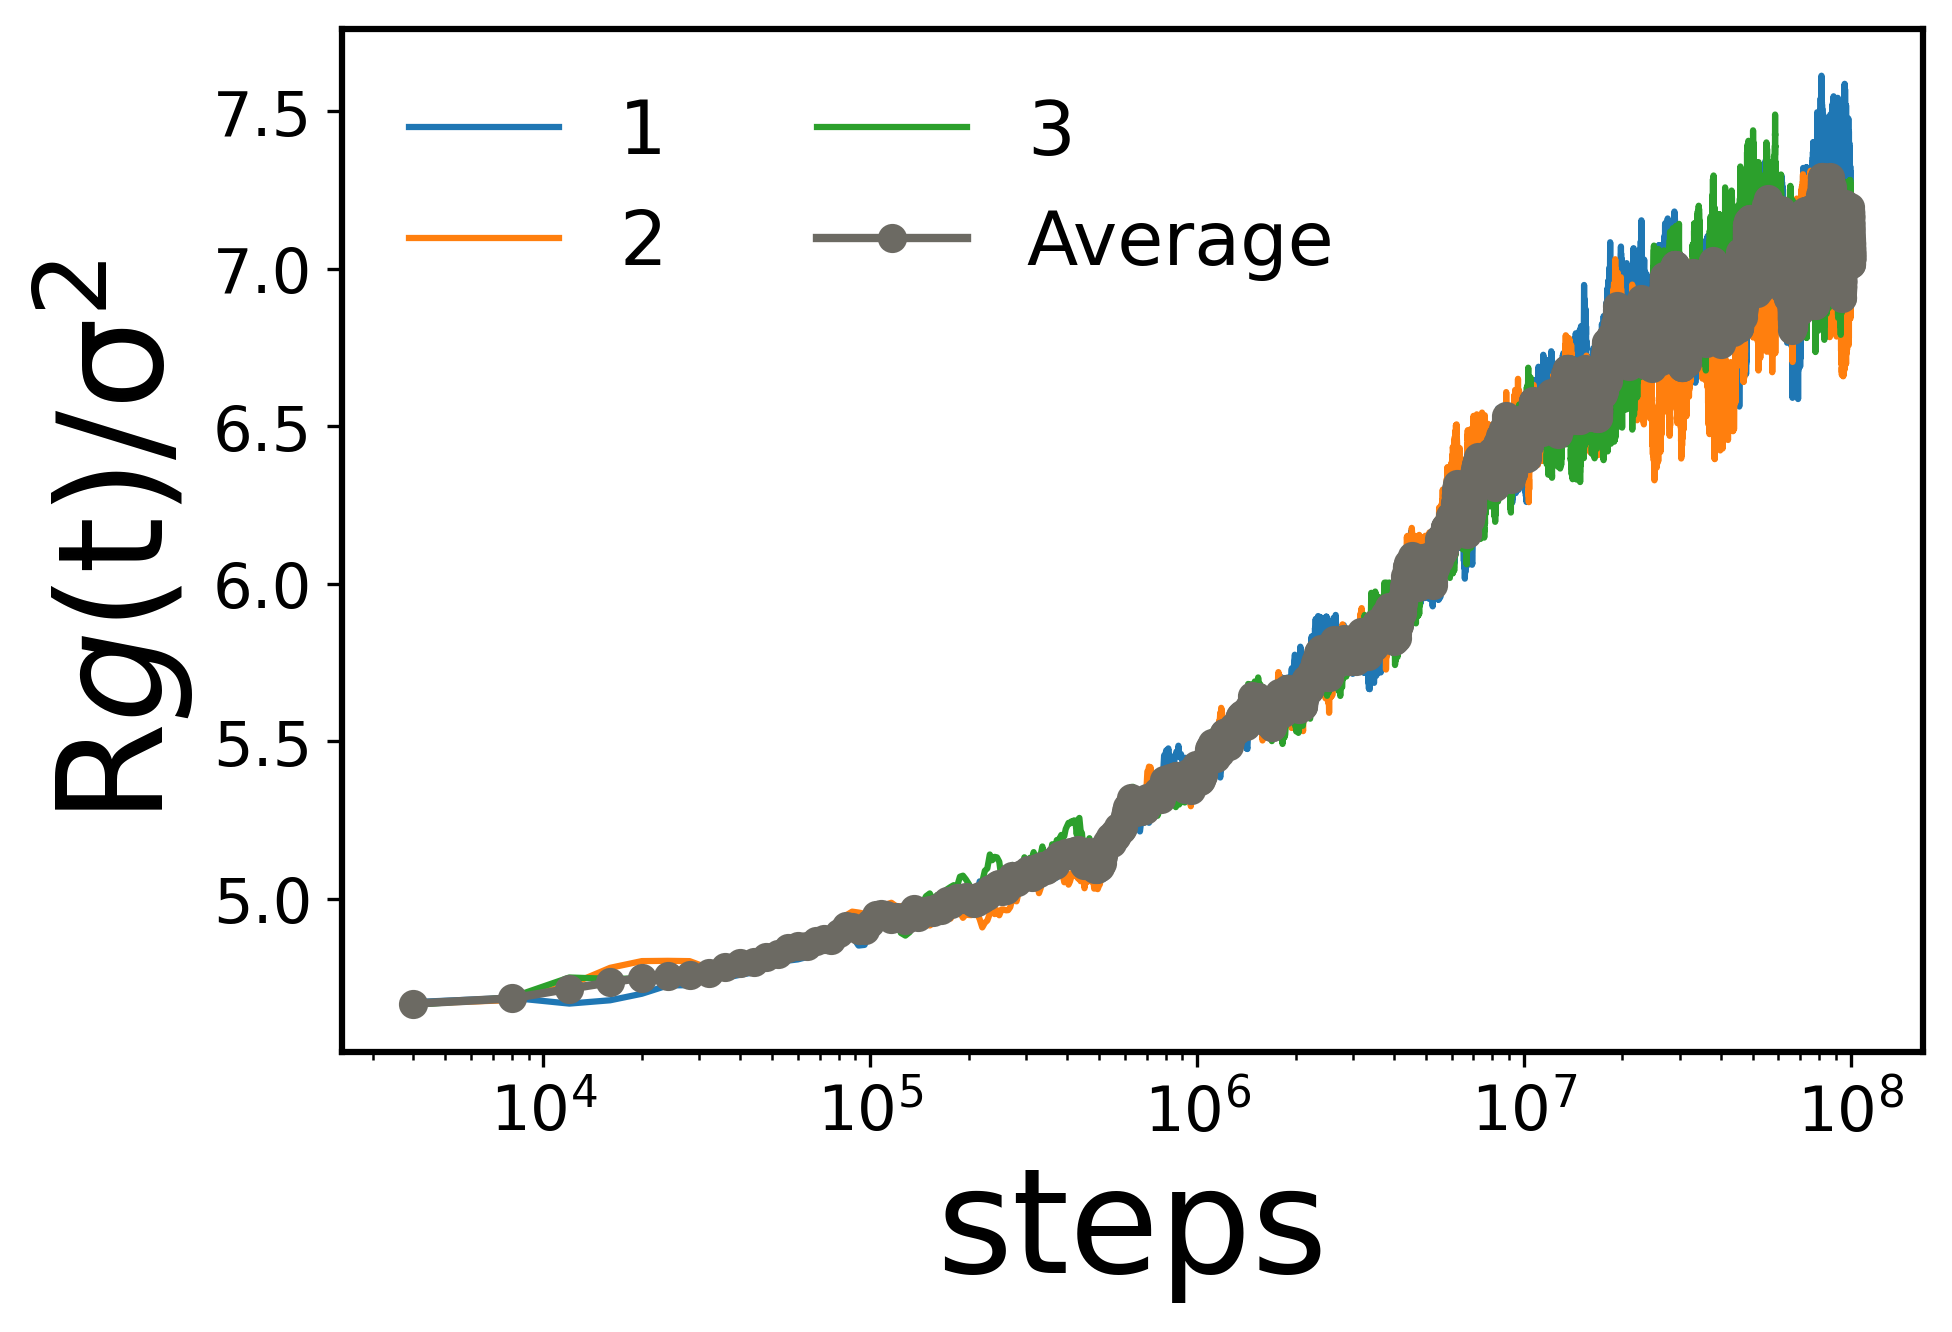

In [4]:

fig, ( ax1) = plt.subplots(1, 1,figsize=(6,4))
fig.tight_layout()
#fig.figsize(20,20)
#ax = fig.add_subplot(111)
#ax1=fig.add_subplot(212)
#ax2=fig.add_subplot(311)
#avg_g123=np.zeros(g123_0.shape)
for axis in ['top','bottom','left','right']:
      ax.spines[axis].set_linewidth(1.5)
      ax1.spines[axis].set_linewidth(1.5)
      #ax2.spines[axis].set_linewidth(1.5)
    
for i in range (0,count):
    print(i)
    exec('g123=g123_%s'%(i))
    ax1.set_ylabel("R$g$(t)/σ",fontsize=30)
    ax1.set_xscale('log')
    ax1.plot(g123[:,0],g123[:,3],label=i+1)

    #avg_g123[:,1:4]+=g123[:,1:4]
#avg_g123[:,1:4]=avg_g123[:,1:4]/count
avg_g123[:,0]=g123[:,0]
ax1.set_ylabel("R$g$(t)/σ$^2$",fontsize=35)
ax1.set_xlabel("steps",fontsize=35)
ax1.tick_params(labelsize=15) 
ax1.plot(avg_g123[:,0],avg_g123[:,3],label="Average",marker='o',color='#6c6a63',lw=2)
#ax1.plot(avg_g123[:,0],avg_g123[:,2],label="g$_3$(t)",marker='H',color='#6c6a63',lw=2)
ax1.legend(loc=2,frameon=False,fontsize=18,ncol=2)
#plt.ticklabel_format(axis='y',style='plain')
#plt.plot(g123[:20,0],0.17*g123[:20,0]**(3/4),'k--')
#plt.plot(g123[50:,0],0.01*g123[50:,0]**1,'k--')
#plt.plot(g123[:30,0],3*g123[:30,0]**(1/2),'k--')
#fig.show(111)
fig.savefig('rgs.png',dpi=300,bbox_inches='tight')

In [5]:
def kde_scipy(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scipy"""
    # Note that scipy weights its bandwidth by the covariance of the
    # input data.  To make the results comparable to the other methods,
    # we divide the bandwidth by the sample standard deviation here.
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return kde.evaluate(x_grid)

data=np.genfromtxt("rg_list.dat")
#data.size*0.1

3.4229107443616336
0.10798392166723625
# Bins: 173


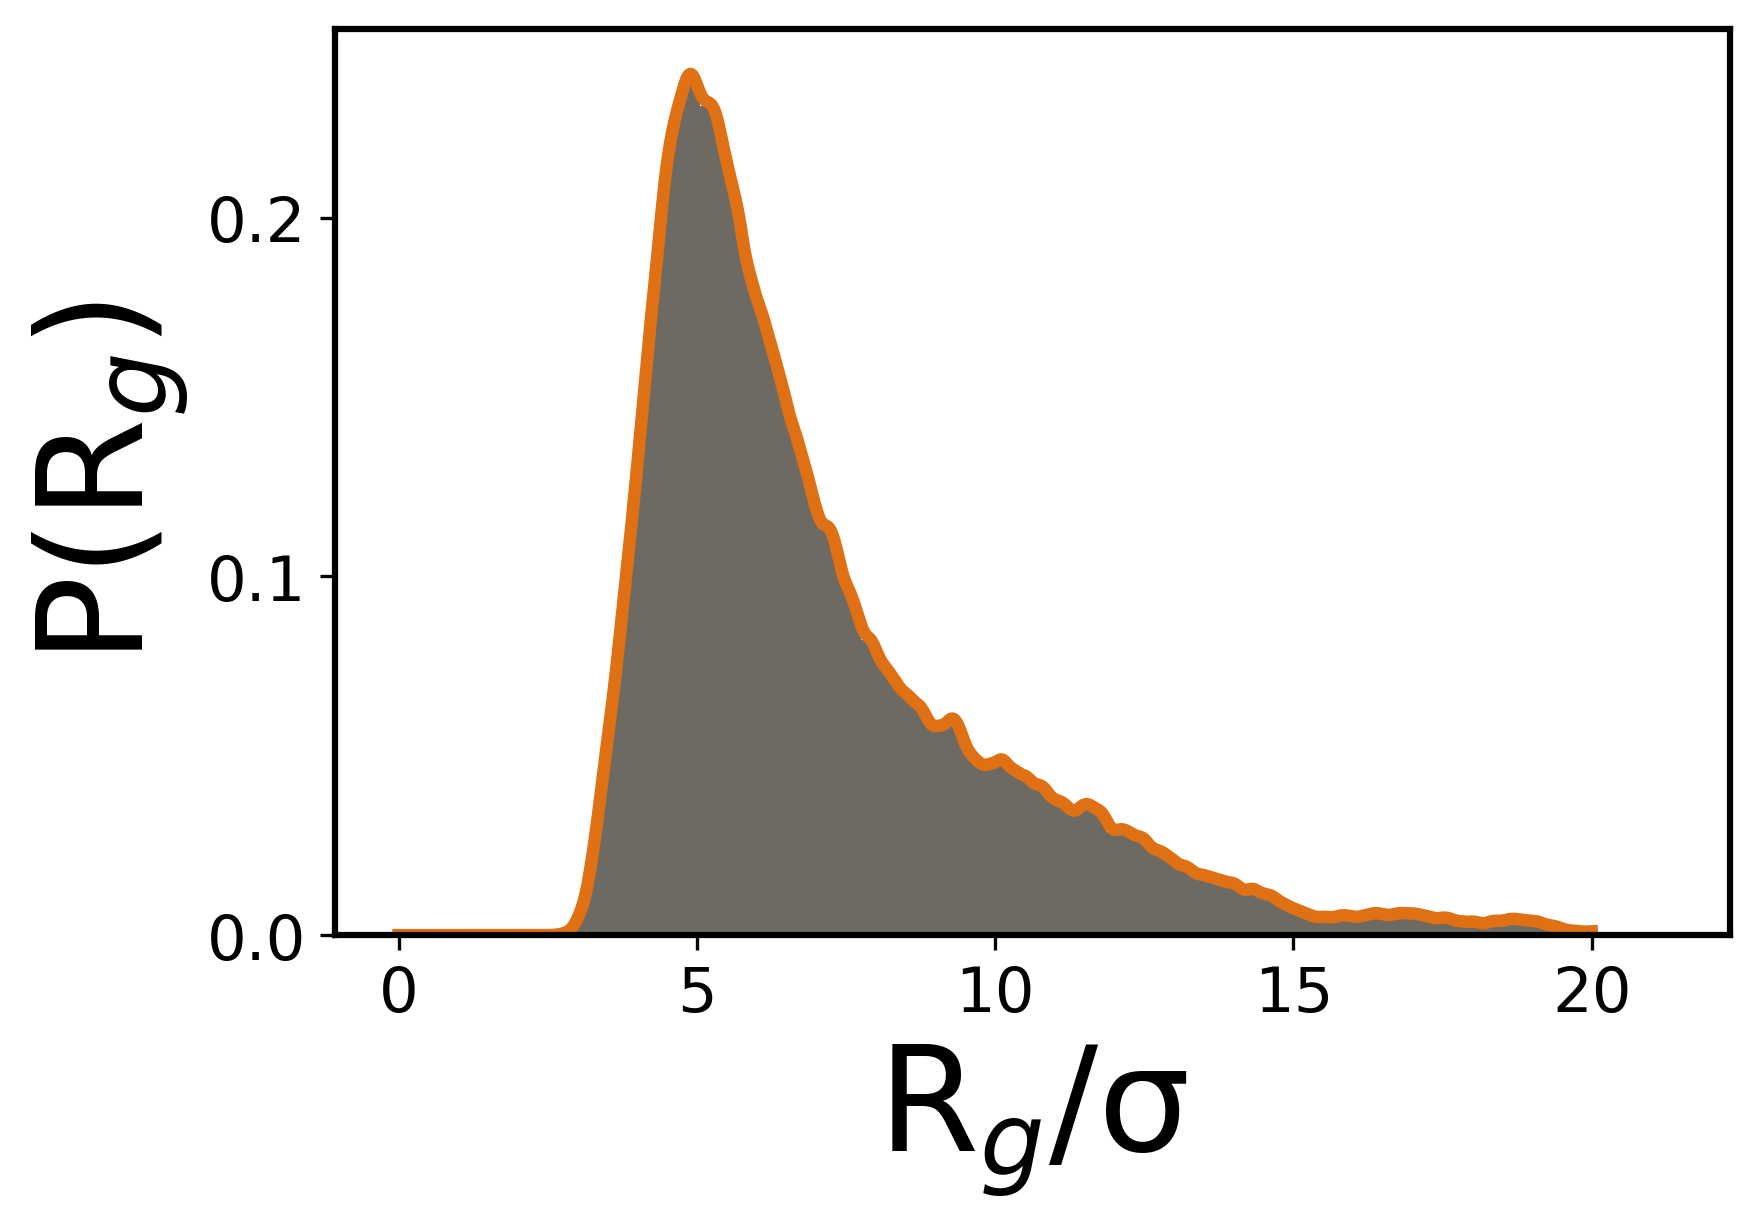

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(1.5)
rgs=np.genfromtxt("rg_list.dat",skip_header=int(data.size*0.9))
rg_iqr=iqr(rgs);print(rg_iqr)
bw=2*rg_iqr/rgs.size**(1/3);print(bw)
nbins=(rgs.max()-rgs.min())/bw;print("# Bins:",int(nbins))
x_grid = np.linspace(0, 20, 1000)
pdf=kde_scipy(rgs,x_grid,0.08)
plt.plot(x_grid,pdf,lw=3,linestyle="-",color='#df7013')
plt.hist(rgs,bins=int(nbins),density=True,color='#6c6a63')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.locator_params(axis='y',nbins=5)
plt.locator_params(axis='x',nbins=5)
plt.ylabel("P(R$_g$)",fontsize=35)
plt.xlabel("R$_g$/σ",fontsize=35)
plt.show()
fig.savefig('rg_dist.png',dpi=300,bbox_inches='tight')
np.savetxt("../pdf_rg_%s"%(fold_part),np.stack((x_grid,pdf),axis=-1))